# Princípios de Comunicação
## Atividade Computacional 1 - Modulação AM

Esta atividade irá explorar os conceitos da modulação em amplitude (AM). Será apresentada uma simulação do processo de modulação AM-DSB-SC e da demodulação síncrona como exemplo. A atividade computacional consistirá na simulação da modulação AM-DSB e por detecção de envoltória.

Serão utilizadas algumas bibliotecas do python, de forma a facilidar cada etapa.

Bibliotecas:

*   librosa - Manipulação de arquivos de áudio
*   numpy - Obtenção da Transformada Discreta de Fourier usando o algoritmo FFT
*   scipy - Filtragem de sinais com filtros do tipo butterworth
*   matplotlib - Gráficos


In [2]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# **Atividade**

Na demonstração que foi apresentada, as mensagens foram moduladas utilizando o processo de modulação AM-DSB-SC, ou seja, modulação em amplitude com portadora suprimida. Neste tipo de modulação, a portadora não é transmitida junto da mensagem modulada, e uma das consequências é não ser possível utilizar um circuito detector de envoltória. Para podermos utilizar um detector de envoltória, a modulação usada é a AM-DSB, na qual transmitimos junto à mensagem uma cópia da portadora. Essa modulação é representada pela equação

$$\Phi_{AM-DSB}(t)=[A+m(t)]cos(\omega_c t).$$

A constante $A$ define a amplitude da portadora e deve ser escolhida de forma a garantir que toda a porção negativa da mensagem seja deslocada e se torne positiva, fazendo com que a envoltória do sinal modulado seja a mensagem.

Se quisermos realizar a demodulação por detecção de envoltória, o primeiro passo consiste em utilizar o filtro passa-faixas, de forma a extrair do canal a porção do espectro associada à menságem que queremos demodular. Em seguida, podemos aplicar o detector de envoltória, o qual é composto por retificador do sinal, filtro passa-baixas e bloqueador de valor DC.

Nesta atividade o objetivo é desenvolver a simulação do processo de modulalção AM-DSB e o processo de demodulação por detecção de envoltória, vizualizando os passos necessários. Dessa forma, desenvolva as seguintes tarefas:

1.   Simule o processo de modulação AM-DSB utilizando dois sinais de áudio, modulados com duas portadoras distintas, escolhendo um fator de modulação adequado para detecção de envoltória;
2.   Mostre os espectros de cada etapa do processo de modulação, discutindo o objetivo de cada etapa;
3.   Simule o processo de demodulação por detecção de envoltória, aplicando o filtro passa-faixas, retificador, filtro passa-baixas e bloqueador de valor DC;
4.   Mostre os espectros de cada etapa do processo de demodulação, discutindo o objetivo de cada etapa;







In [3]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 1. Simulação de processo de modulação AM-DSB com dois áudios.


## 1.1.1. Escolha de dois sinais de áudios utilizando a biblioteca Librosa.

In [4]:
# Endereços dos arquivos de áudio
fishin = librosa.ex("fishin")
pistachio = librosa.ex("pistachio")

# Leitura do arquivo como um array numpy considerando a taxa de amostragem original do arquivo
array_audio1, taxa_amostragem_1 = librosa.load(fishin, sr=None)
array_audio2, taxa_amostragem_2 = librosa.load(pistachio, sr=None)

# Retirando um trecho de 5 segundos dos áudios
amostras_5s = 5 * taxa_amostragem_1
array_audio1_cortado=array_audio1[0:amostras_5s]

amostras_5s = 5 * taxa_amostragem_2
array_audio2_cortado=array_audio2[0:amostras_5s]

In [5]:
Audio(data=array_audio1_cortado, rate=taxa_amostragem_1)

In [6]:
Audio(data=array_audio2_cortado, rate=taxa_amostragem_2)

In [7]:
# Definindo a frequência de amostragem para simular a trasmissão como se tivessemos usando um sistema contínuo
freq_superamostragem = 1e6
freq_subamostragem = 1e4

array_audio_1_subamostrado = librosa.resample(array_audio1_cortado, orig_sr=taxa_amostragem_1, target_sr=freq_subamostragem)
# Reamostrando o áudio para a frequência mais alta
array_audio_1_superamostrado = librosa.resample(array_audio_1_subamostrado, orig_sr=freq_subamostragem, target_sr=freq_superamostragem)

array_audio_2_subamostrado = librosa.resample(array_audio2_cortado, orig_sr=taxa_amostragem_2, target_sr=freq_subamostragem)
# Reamostrando o áudio para a frequência mais alta
array_audio_2_superamostrado = librosa.resample(array_audio_2_subamostrado, orig_sr=freq_subamostragem, target_sr=freq_superamostragem)

### 1.1.2. Gráfico do sinal de áudio 1 e 2

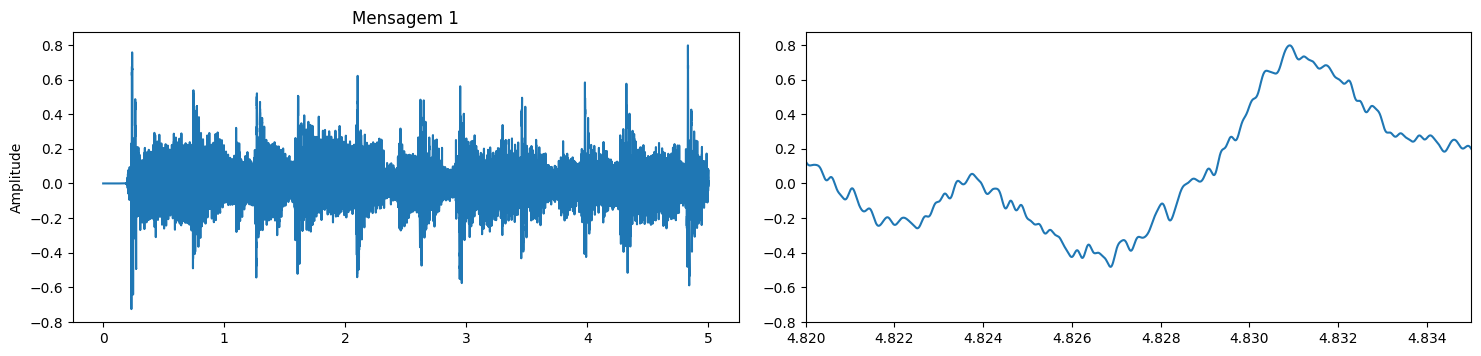

In [8]:
eixo_t=np.linspace(0, 5, len(array_audio_1_superamostrado))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,array_audio_1_superamostrado)
plt.ylabel('Amplitude')
plt.title('Mensagem 1')
plt.subplot(3,2,2)
plt.plot(eixo_t,array_audio_1_superamostrado)
plt.xlim(4.82, 4.835)
plt.tight_layout()

**Pode ser percebido que o primeiro sinal de áudiovaria de -0.8 a +0.8 ao longo do tempo. Isso nos dá dica de quanto será mais ou menos o fator de modulação para esse sinal**

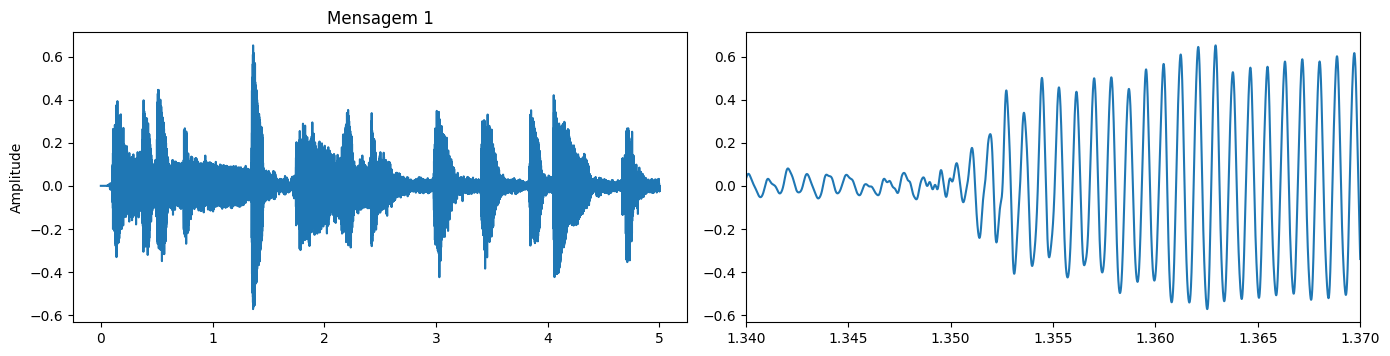

In [9]:
eixo_t=np.linspace(0, 5, len(array_audio_2_superamostrado))
# Plotando o sinal de áudio
plt.figure(figsize = (14, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,array_audio_2_superamostrado)
plt.ylabel('Amplitude')
plt.title('Mensagem 1')

plt.subplot(3,2,2)
plt.plot(eixo_t,array_audio_2_superamostrado)
plt.xlim(1.34,1.37)
plt.tight_layout()

**Já no segundo sinal de áudio, pode ser percebido ele varia de -0.6 a +0.6 ao longo do tempo. Novamente, isso nos dá dica de quanto será mais ou menos o fator de modulação para esse sinal**

## 1.2.1 Escolha de dois portadores com frequência diferente.
A primeira portadora terá a frequência fundamental de 1 Hz enquanto que a segunda terá 10 Hz, essas duas portadoras com frequências fundamentais distintas possibilitará o envio de duas mensagens utilizando um canal.

In [10]:
# Frequência da portadora da rádio 1 [Hz]
fc1 = 5e4

# Criando a portadora 1
eixo_t=np.linspace(0, 5, len(array_audio_1_superamostrado))
portadora_1=np.zeros([len(array_audio_1_superamostrado)])
for i in range(0,len(array_audio_1_superamostrado)):
    portadora_1[i]=np.cos(2*np.pi*fc1*eixo_t[i])

# Frequência da portadora da rádio 5 [Hz]
fc2 = 5 *fc1

# Criando a portadora 2
eixo_t=np.linspace(0, 5, len(array_audio_2_superamostrado))
portadora_2=np.zeros([len(array_audio_2_superamostrado)])
for i in range(0,len(array_audio_2_superamostrado)):
    portadora_2[i]=np.cos(2*np.pi*fc2*eixo_t[i])

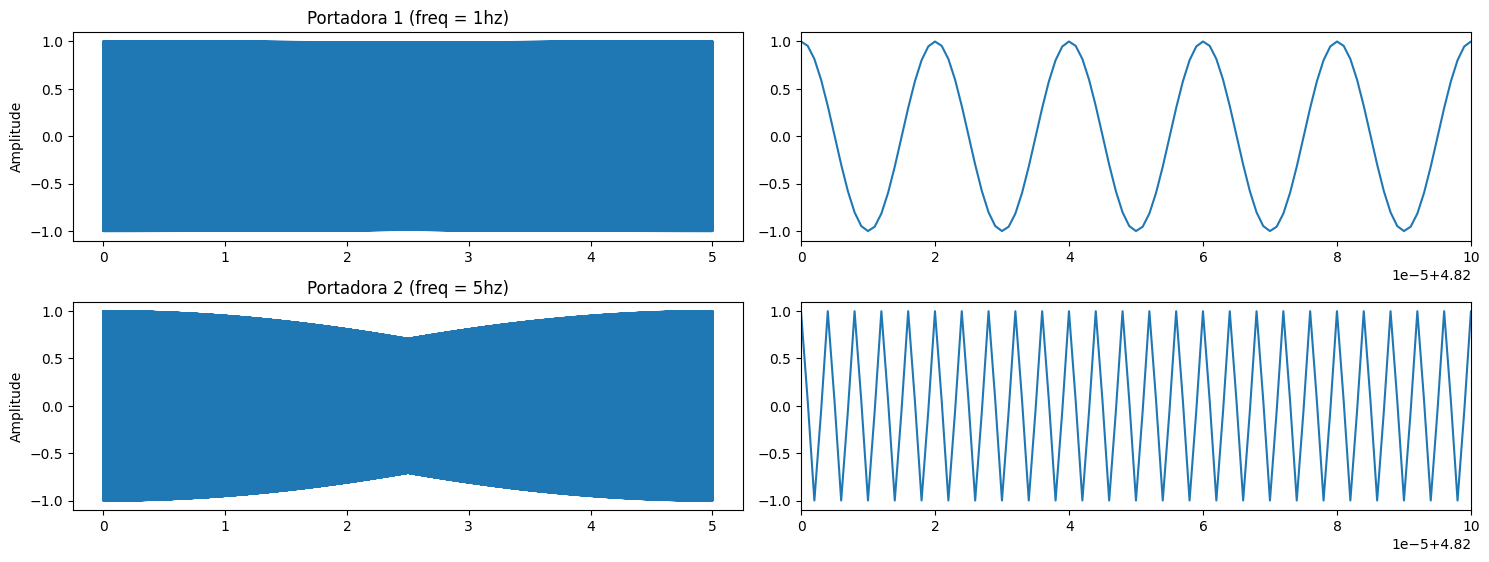

In [11]:
eixo_t=np.linspace(0, 5, len(array_audio_1_superamostrado))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 8))
plt.subplot(3,2,1)
plt.plot(eixo_t,portadora_1)
plt.ylabel('Amplitude')
plt.title('Portadora 1 (freq = 1hz)')
plt.subplot(3,2,2)
plt.plot(eixo_t,portadora_1)
plt.xlim(4.82, 4.8201)

# Plotando o sinal de áudio
plt.subplot(3,2,3)
plt.plot(eixo_t,portadora_2)
plt.ylabel('Amplitude')
plt.title('Portadora 2 (freq = 5hz)')
plt.subplot(3,2,4)
plt.plot(eixo_t,portadora_2)
plt.xlim(4.82, 4.8201)
plt.tight_layout()

## 1.3.1 Fator de modulação
O fator de modulação, é definido como:

$$ \mu = \frac{A_m}{A_c}$$

onde,


*   $A_m$ é a amplitude do sinal modulador  
*   $A_c$ é a amplitude da portadora  

Para a detecção por envoltória funcionar corretamente,o fator de modulação deve estar no intervalo $ 0 < m \le 1$.



*   Se $ m > 1$ não é possível fazer demodulação por detecção de envoltório
*   Se $ m \le 1$ é possível realizar demodulação, no entanto quando menor $m$ mais potencia será utilizada.

No entanto, há um forma mais fácil de encontrar computacionalmente o fator de de modulação. Apenas utilizando:

```python
  min(sinal)
```

Assim sabemos o minimo de valor $A$ para que o sinal fique todo acima acima do eixo positivo da abscissa.



In [12]:
print(f"O valor minimo que o sinal de áudio 1 assume é {min(array_audio_1_superamostrado)}\n")
print(f"O valor minimo que o sinal de áudio 2 assume é {min(array_audio_2_superamostrado)}\n")


O valor minimo que o sinal de áudio 1 assume é -0.7259854078292847

O valor minimo que o sinal de áudio 2 assume é -0.5719702243804932



Note que os valores está bem próximo ao esperado e relatado na seção 1.1.2.

Portanto os valores adotados para os coeficientes de modulação será ligeiramente maior que os valores minímos, pois assim garatimos que todo o sinal está acima do eixo negativo. Ou seja, para a mensagem 1 o A1 será 0.73 enquanto que para a mensagem 2 será A2 = 0.58

In [13]:
A1 = 0.73
A2 = 0.58
m1 = array_audio_1_superamostrado + A1
m2 = array_audio_2_superamostrado + A2

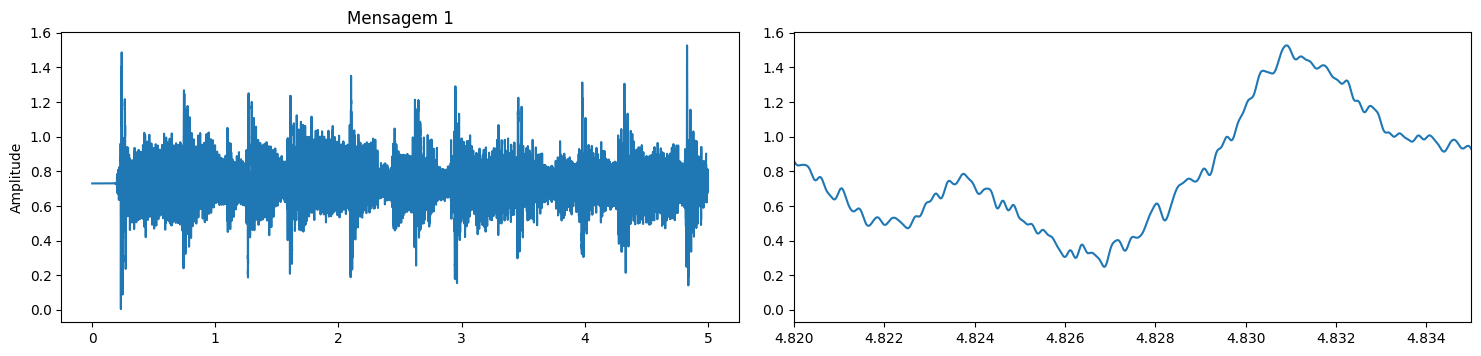

In [14]:
eixo_t=np.linspace(0, 5, len(m1))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,m1)
plt.ylabel('Amplitude')
plt.title('Mensagem 1')
plt.subplot(3,2,2)
plt.plot(eixo_t,m1)
plt.xlim(4.82, 4.835)
plt.tight_layout()

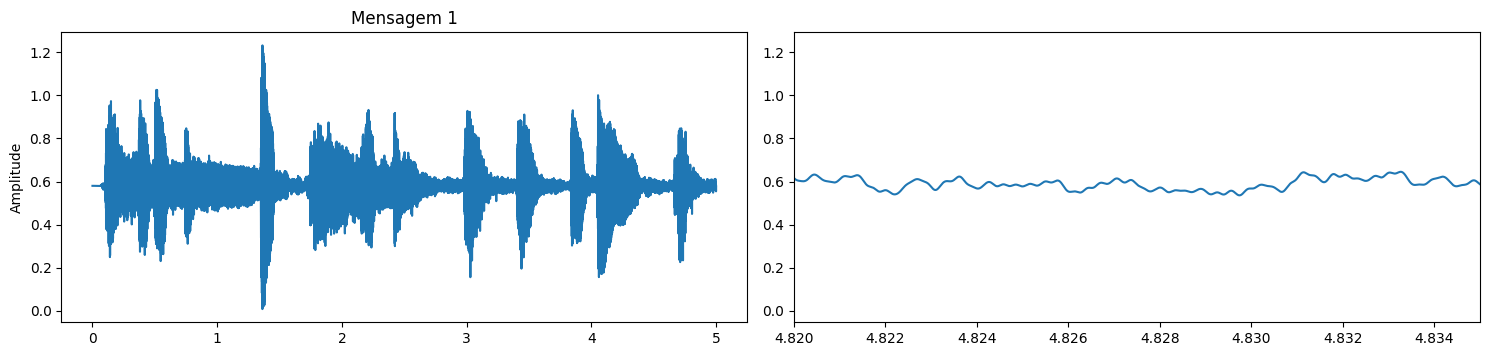

In [15]:
eixo_t=np.linspace(0, 5, len(m2))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,m2)
plt.ylabel('Amplitude')
plt.title('Mensagem 1')
plt.subplot(3,2,2)
plt.plot(eixo_t,m2)
plt.xlim(4.82, 4.835)
plt.tight_layout()

Podemos perceber que, após somar as constantes pelos respectivos fatores de modulação, os dois sinais estão possuem valores positivos para todos os valores no tempo e 0 a 5 Segundos.

# 2. Espectro de cada etapa da modulação.

A modulação consiste em multiplicar o sinal de mensagem por um cosseno de frequência elevada, chamado de portadora. Esse processo desloca o espectro do sinal original para regiões em torno da frequência da portadora, permitindo que a informação seja transmitida em bandas de frequência específicas, adequadas para propagação e separação de canais.

Dessa forma, nesta seção, o objetivo é plotar o espectro das duas portadoras, definidas em  1.2.1, dos sinais de áudio e do sinal resultante após a modulação.

## 2.1. Espectro das portadoras



In [16]:
# Calcular FFT
fft_portadora_1 = np.fft.fft(portadora_1)
fft_portadora_2 = np.fft.fft(portadora_2)


In [17]:

N = len(fft_portadora_1)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_portadora_1 = n / T


Text(0.5, 1.0, 'FFT Portadora 1')

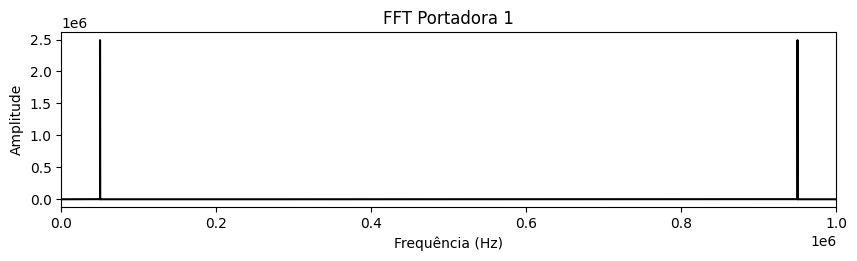

In [18]:
# Plot espectral da Mensagem 1
plt.figure(figsize=(10, 5))

# Definir o limite máximo para o eixo x
max_freq = freq_superamostragem

plt.subplot(2, 1, 1)
plt.plot(array_freq_portadora_1, np.abs(fft_portadora_1), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, max_freq)
plt.title('FFT Portadora 1')


In [19]:
N = len(fft_portadora_2)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_portadora_2 = n / T

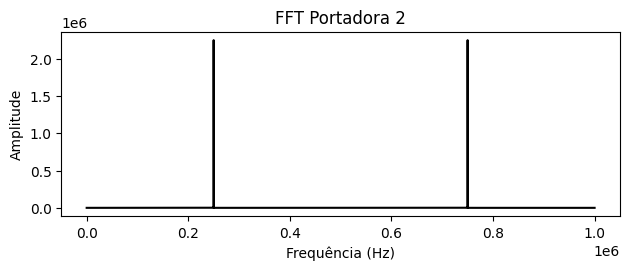

In [20]:


plt.subplot(2, 1, 2)
plt.plot(array_freq_portadora_2, np.abs(fft_portadora_2), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Portadora 2')


plt.tight_layout()
plt.show()

## 2.2. Espectro das mensagens



Text(0.5, 1.0, 'FFT Mensagem 2')

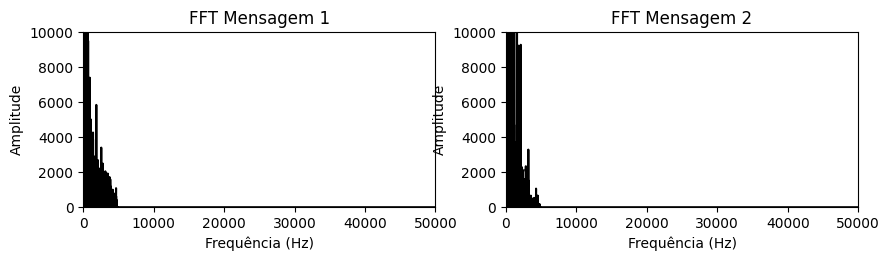

In [21]:
fft_m1 = np.fft.fft(m1)
fft_m2 = np.fft.fft(m2)


N = len(fft_m1)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_m1 = n / T

N = len(fft_m2)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_m2 = n / T

# Plot espectral da Mensagem 1
plt.figure(figsize=(10, 5))


plt.subplot(2, 2, 1)
plt.plot(array_freq_m1, np.abs(fft_m1), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(0, 50000)
plt.title('FFT Mensagem 1')

plt.subplot(2, 2, 2)
plt.plot(array_freq_m2, np.abs(fft_m2), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(0, 50000)
plt.title('FFT Mensagem 2')

## 2.3. Espectro das mensagens moduladas

In [22]:
am_dsb1 = m1 * portadora_1
am_dsb2 = m2 * portadora_2

fft_am_dsb1 = np.fft.fft(am_dsb1)
fft_am_dsb2 = np.fft.fft(am_dsb2)


N = len(fft_am_dsb1)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_am_dsb1 = n / T

N = len(fft_am_dsb2)
n = np.arange(N)
T = N/freq_superamostragem
array_am_dsb2 = n / T


Text(0.5, 1.0, 'FFT Mensagem 2')

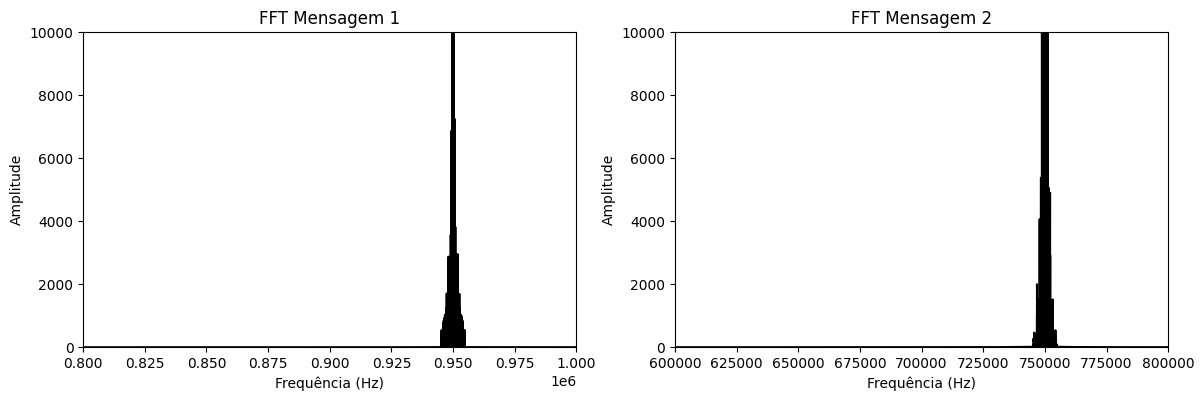

In [23]:

# Plot espectral da Mensagem 1
plt.figure(figsize=(14, 9))


plt.subplot(2, 2, 1)
plt.plot(array_freq_am_dsb1, np.abs(fft_am_dsb1), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(8e5, 1e6)
plt.title('FFT Mensagem 1')

plt.subplot(2, 2, 2)
plt.plot(array_am_dsb2, np.abs(fft_am_dsb2), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(6e5, 8e5)
plt.title('FFT Mensagem 2')

Perceba que as mensagem foram deslocadas no espectro.

# 3. Envio de mensagem por um canal compartilhado.

Nesta seção, será apresentada a forma do sinal no canal compartilhado, bem como o seu respectivo espectro.


In [24]:
channel = am_dsb1 + am_dsb2

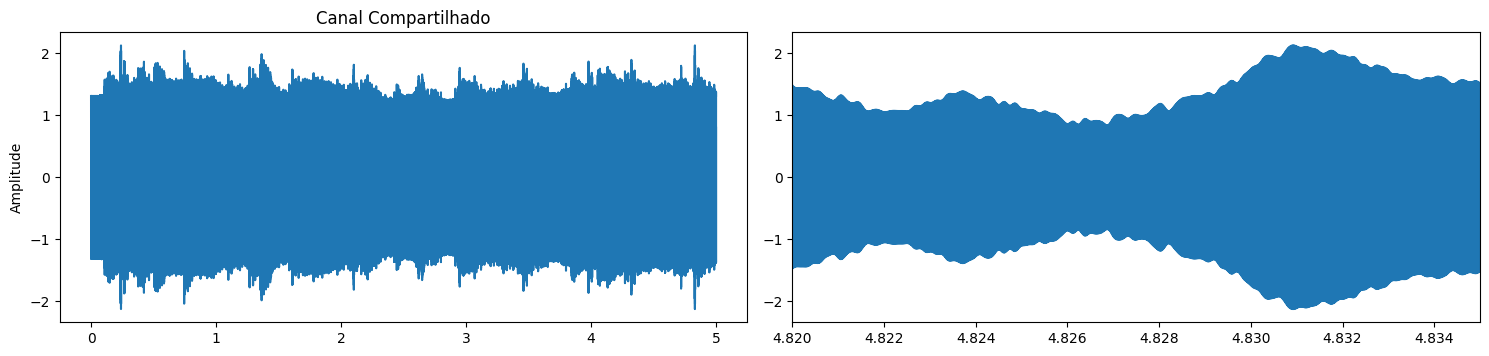

In [25]:
eixo_t=np.linspace(0, 5, len(channel))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,channel)
plt.ylabel('Amplitude')
plt.title('Canal Compartilhado')
plt.subplot(3,2,2)
plt.plot(eixo_t,channel)
plt.xlim(4.82, 4.835)
plt.tight_layout()

Pode-se perceber que as mensagens 1 e 2 interferem entre si, o que faz com que percam suas características originais e se tornem impossíveis de distinguir.

Text(0.5, 1.0, 'FFT Mensagem 1')

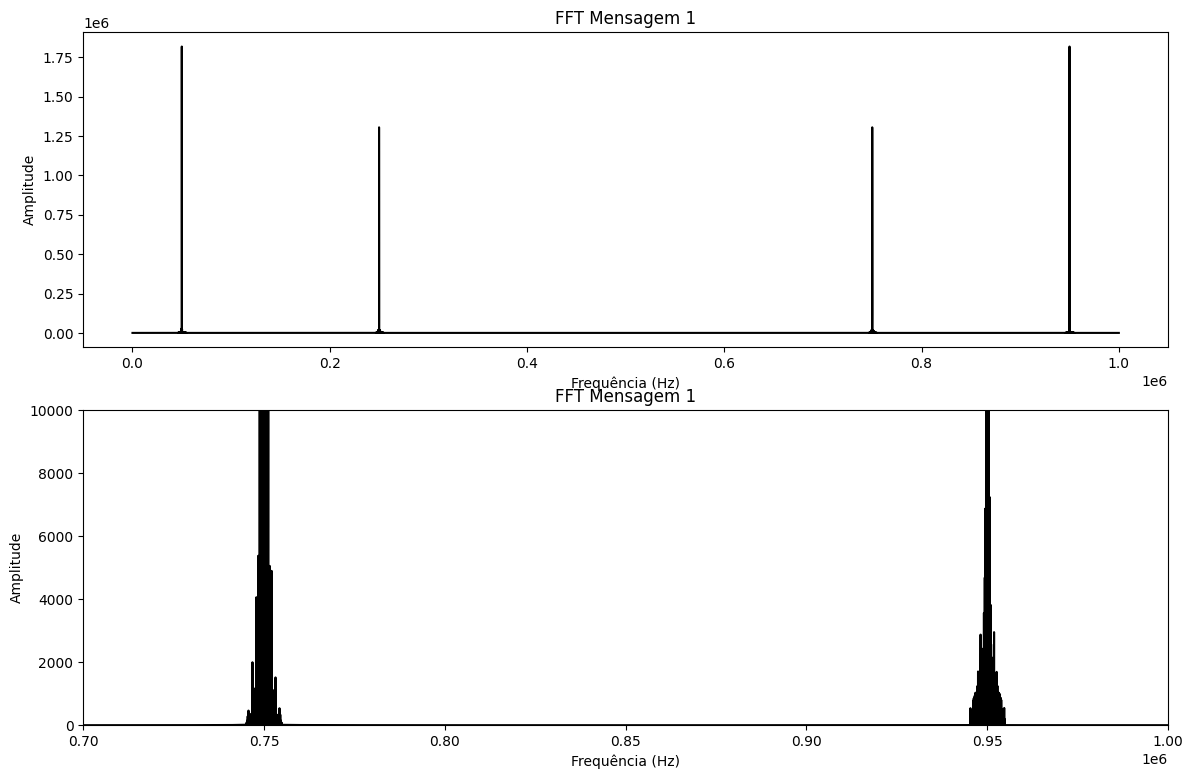

In [26]:

fft_ch = np.fft.fft(channel)


N = len(fft_ch)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_ch = n / T


# Plot espectral da Mensagem 1
plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(array_freq_ch, np.abs(fft_ch), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Mensagem 1')

plt.subplot(2, 1, 2)
plt.plot(array_freq_ch, np.abs(fft_ch), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(7e5, 1e6)
plt.title('FFT Mensagem 1')


Perceba que no espectro as mensagens estão bem separadas

# 4. Demodulação

A demodulação por detecção de envoltória consistem em 4 etapas:



*   Filtro passa-faixa;
*   Retificador;
*   Filtro passa-baixas;
*   Bloqueador de valor DC


O objetivo desta seção é recuperar o áudio 2, descrevendo o objetivo de cada etapa.

## Aplicação de Filtro passa-faixa

Na detecção por envoltória, um filtro passa-faixa tem como  objetivo de isolar apenas o sinal modulado em torno da frequência da portadora.

Text(0.5, 1.0, 'FFT Mensagem 2')

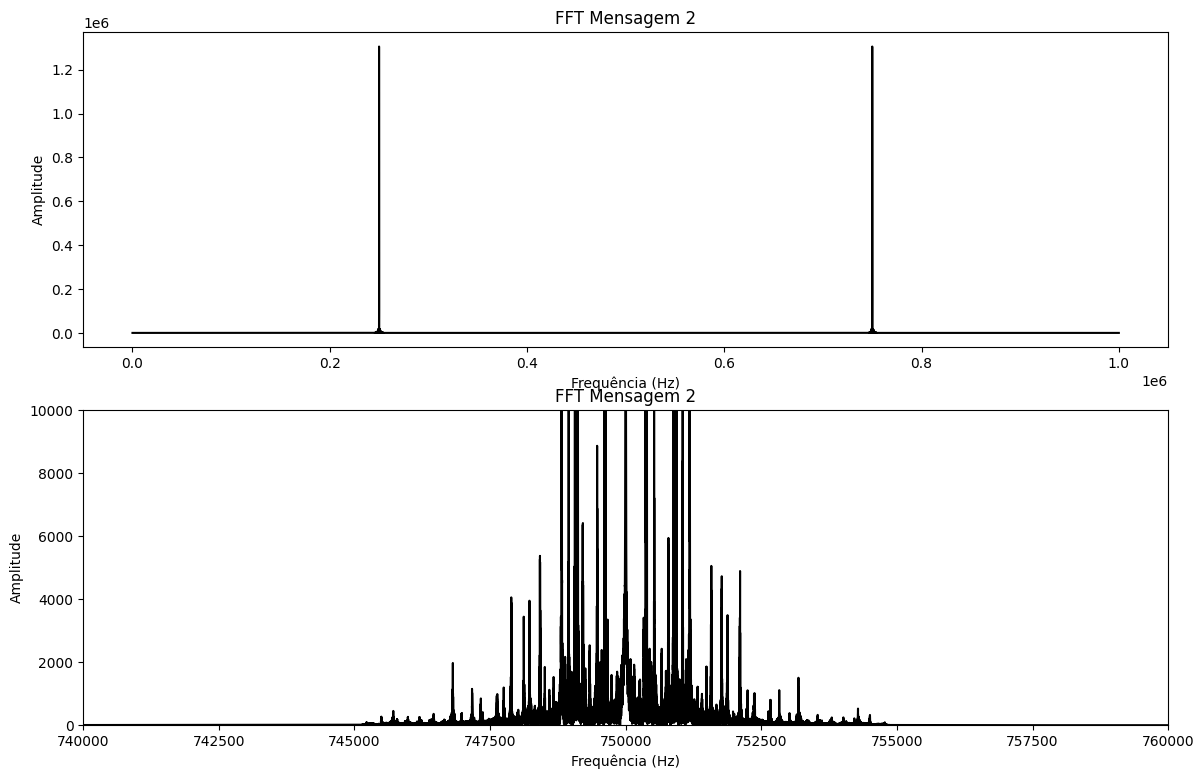

In [27]:
low_pf = fc2 - freq_subamostragem
high_pf = fc2 + freq_subamostragem
ordem = 2

b, a = butter(ordem, [low_pf, high_pf], btype='band', analog=False, output='ba', fs=freq_superamostragem)
sinal_filtrado_base = filtfilt(b, a, channel)
fft_sinal_filtrado_base = np.fft.fft(sinal_filtrado_base)


N = len(fft_sinal_filtrado_base)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_sinal_filtrado_base  = n / T


# Plot espectral da Mensagem 1
plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(array_freq_sinal_filtrado_base, np.abs(fft_sinal_filtrado_base), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Mensagem 2')

plt.subplot(2, 1, 2)
plt.plot(array_freq_sinal_filtrado_base, np.abs(fft_sinal_filtrado_base), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(7.4e5, 7.6e5)
plt.title('FFT Mensagem 2')

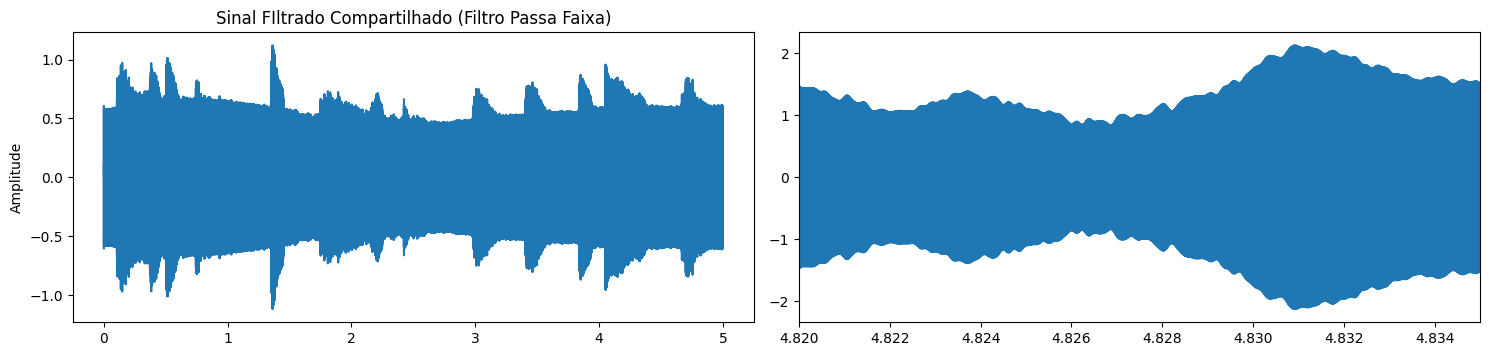

In [28]:
eixo_t=np.linspace(0, 5, len(sinal_filtrado_base))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,sinal_filtrado_base)
plt.ylabel('Amplitude')
plt.title('Sinal FIltrado Compartilhado (Filtro Passa Faixa)')
plt.subplot(3,2,2)
plt.plot(eixo_t,channel)
plt.xlim(4.82, 4.835)
plt.tight_layout()

## Aplicação de um Retificador

A retificação é uma etapa essencial na detecção por envoltória. Ela serve para eliminar a parte negativa do sinal AM, deixando só os "topos" positivos da onda. Isso é importante porque a envoltória, que carrega a informação original, está presente na variação da amplitude, e a forma dela é igual tanto na parte positiva quanto na negativa.

In [29]:
sinal_retificado = np.abs(sinal_filtrado_base)

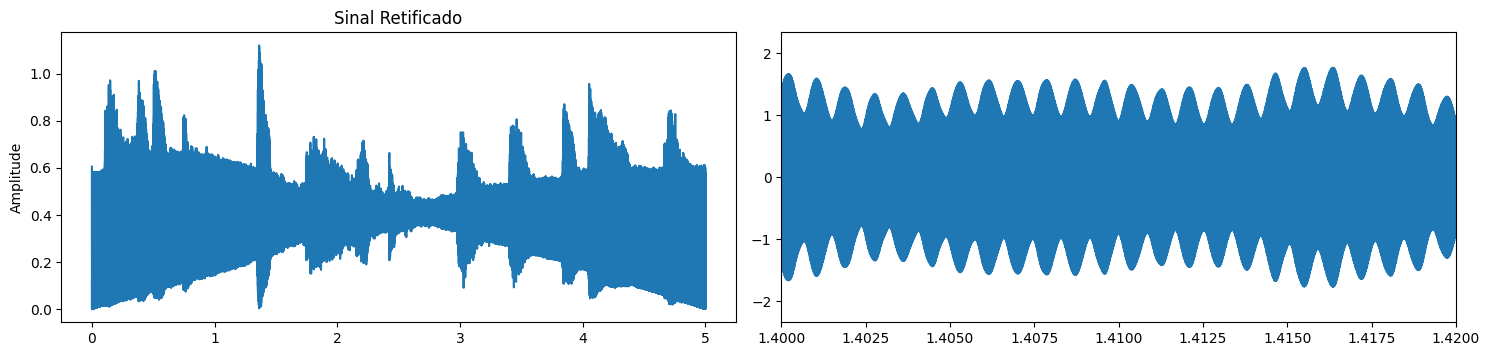

In [30]:
eixo_t=np.linspace(0, 5, len(sinal_retificado))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,sinal_retificado)
plt.ylabel('Amplitude')
plt.title('Sinal Retificado')
plt.subplot(3,2,2)
plt.plot(eixo_t,channel)
plt.xlim(1.4, 1.42)
plt.tight_layout()

## Aplicação de um Filtro Passa-baixas

o objetivo de passar o sinal por um filtro passa-baixas é remover as componentes de alta frequência, especialmente a frequência da portadora e suas harmônicas, que ainda estão presentes após a retificação.



In [31]:
# 3. Filtro passa-baixas para extrair a mensagem da envoltória
b, a = butter(ordem, freq_subamostragem, btype='low', analog=False, output='ba', fs=freq_superamostragem)
sinal_filtrado_baixo = filtfilt(b, a, sinal_retificado)


Text(0.5, 1.0, 'FFT Mensagem 2')

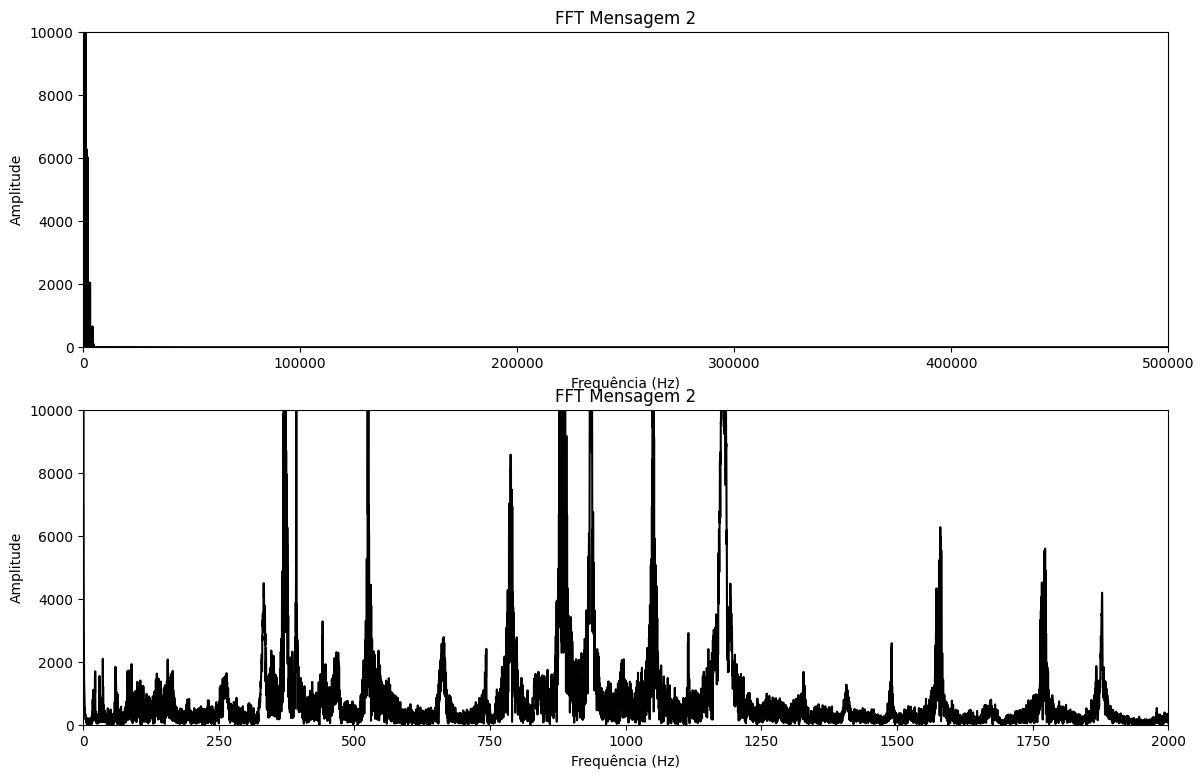

In [40]:
fft_sinal_filtrado_baixo = np.fft.fft(sinal_filtrado_baixo)


N = len(fft_sinal_filtrado_baixo)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_sinal_filtrado_baixo  = n / T


# Plot espectral da Mensagem 1
plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(array_freq_sinal_filtrado_base, np.abs(fft_sinal_filtrado_baixo), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(0, 5e5)

plt.title('FFT Mensagem 2')

plt.subplot(2, 1, 2)
plt.plot(array_freq_sinal_filtrado_base, np.abs(fft_sinal_filtrado_baixo), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 10000)
plt.xlim(0, 2e3)
plt.title('FFT Mensagem 2')

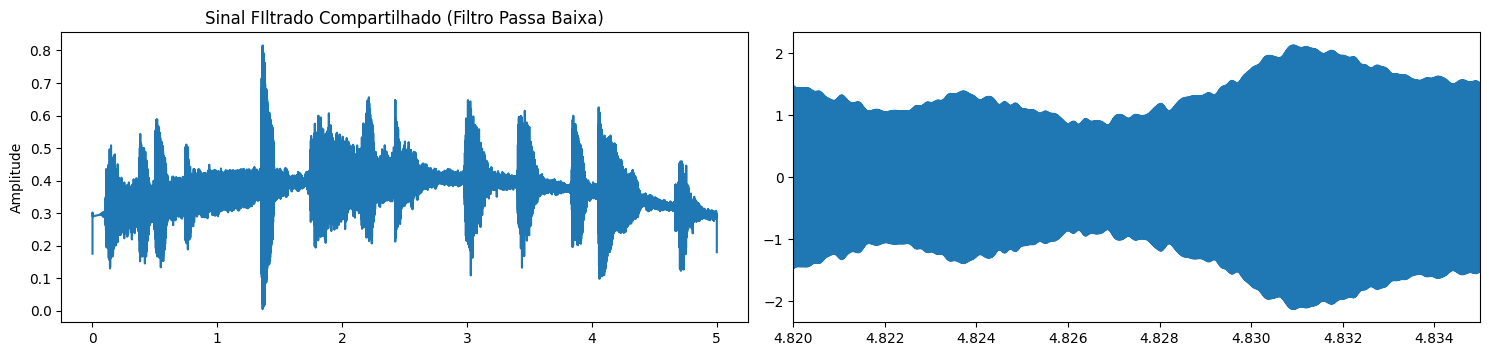

In [33]:
eixo_t=np.linspace(0, 5, len(sinal_filtrado_baixo))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,sinal_filtrado_baixo)
plt.ylabel('Amplitude')
plt.title('Sinal FIltrado (Filtro Passa Baixa)')
plt.subplot(3,2,2)
plt.plot(eixo_t,channel)
plt.xlim(4.82, 4.835)
plt.tight_layout()

## Bloqueador de valor DC
O bloqueador de DC  é usado para eliminar o nível médio constante do sinal, ou seja, a componente de frequência zero.

Na detecção por envoltória, depois do filtro passa-baixas, o sinal recuperado ainda pode ter um valor médio elevado por causa da portadora somada durante a modulação. Esse valor fixo não faz parte da informação original, então ao passar o sinal por um bloqueador de DC, remove-se esse desvio, deixando apenas as variações que representam a mensagem real. Isso torna o sinal final mais fiel ao que foi transmitido, centrado em torno de zero.

In [42]:
sinal_demodulado = sinal_filtrado_baixo - np.mean(sinal_filtrado_baixo)


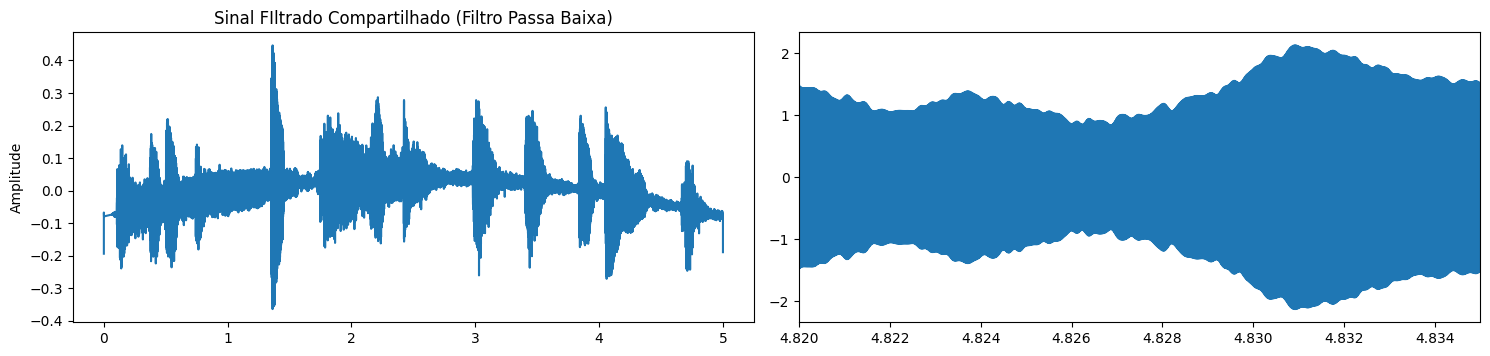

In [43]:
eixo_t=np.linspace(0, 5, len(sinal_demodulado))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,sinal_demodulado)
plt.ylabel('Amplitude')
plt.title('Sinal FIltrado demodulado')
plt.subplot(3,2,2)
plt.plot(eixo_t,channel)
plt.xlim(4.82, 4.835)
plt.tight_layout()

In [44]:
array_audio_demodulado = librosa.resample(sinal_demodulado, orig_sr=freq_superamostragem, target_sr=taxa_amostragem_1)

Audio(data=array_audio_demodulado, rate=taxa_amostragem_1)